# Notebook Setup

In [1]:
import os
import seaborn as sns
import logging
%matplotlib inline

In [2]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [3]:
def read_contents(filename):
    with open(filename) as this_file:
        file_content = this_file.readlines()
        
    return file_content

# DySE Framework

## Load Model

In [4]:
from Translation.model import get_model

In [5]:
model_file = 'models/wm_translation_2.xlsx'
model_ = get_model(model_file)

In [6]:
# display a subset of model columns 
model_[['Element Name','Positive','Negative','Initial 0']]

,Element Name,Positive,Negative,Initial 0
Variable,,,,
egg_productivity,egg_productivity,0.1&0.9*bird_condition_healthy,-0.1&0*bird_condition_healthy,"11,11[2],11[4],11[6],11[8],11[10],11[12],11[14..."
health_intensive_care,health_intensive_care,,,"10,10[2],10[4],10[6],10[8],10[10],10[11],10[13..."
egg_consumption,egg_consumption,0.1&0.9*egg_production,-0.1&0*egg_production,"12,12[4],13[8],10[13],10[17],10[21],14[25],16[..."
fuel_emissions,fuel_emissions,0.1&0.9*poultry_feed,-0.1&0*poultry_feed,"18,18[4],18[8],17[13],17[17],17[21],15[25],15[..."
economy,economy,0.1&0.9*poultry+0.1&0.9*indigenous_breeds,-0.1&0*poultry+-0.1&0*indigenous_breeds,"15,11[2],17[4],16[6],13[8],13[10],19[12],15[14..."
bird_condition_healthy,bird_condition_healthy,0.1&0.9*vaccination+0.1&0.9*poultry_management,-0.1&0*vaccination+-0.1&0*poultry_management,"11,11[2],11[4],11[6],11[8],11[10],11[12],11[14..."
poultry_management,poultry_management,0.1&0.9*economy,-0.1&0*economy,"11,11[2],11[4],11[6],11[8],11[10],11[12],11[14..."
feed_marketing,feed_marketing,-0.1&0*poultry_feed_price_or_cost,0.1&0.9*poultry_feed_price_or_cost,"10,10[9],14[19],14[29],15[38],20[47],18[57],18..."
vaccination,vaccination,-0.1&0*vaccination_unavailability+-0.1&0*highe...,0.1&0.9*vaccination_unavailability+0.1&0.9*hig...,"10,10[2],10[4],10[6],10[8],10[10],10[11],10[13..."


## Simulate

In [7]:
from Simulation.Simulator_Python import simulator_interface as sim

In [8]:
# simulation parameters
output_path = 'traces'
steps = 200
runs = 100
scenarios = [0,]
output_format = 1 # all runs and frequency summaries
scheme = 'ra'

In [9]:
scenarios_sorted = [str(x) for x in sorted(scenarios)]

# set up output paths
if not os.path.exists(output_path):
    os.mkdir(output_path)
output_basename = os.path.join(output_path,'wm_translation_2')

In [10]:
# simulate 
sim.setup_and_run_simulation(
         model_file, 
         output_basename + '.txt', 
         steps, 
         runs, 
         scheme, 
         output_format,
         ','.join(scenarios_sorted)
         )

INFO:root:Simulation scenario 0 complete


## Visualize simulation results

In [11]:
import os
import Translation.model as mdl
import Visualization.visualization_interface as viz

### Define parameters and load from files

In [12]:
# model and output file locations (same as simulation example above)
output_path = 'traces'
output_basename = os.path.join(output_path,'wm_translation_2')

In [13]:
# visualization parameters
elements_list = ['location','income']
scenarios = [0,]
colors = None # can be a list of colors, length matching the number of scenarios
linestyles = None # can be a list, length matching the number of scenarios
linewidth = 2
normalize_levels = True # whether to plot y axis as a percentage

In [14]:
# get scenario labels from model
model_ = mdl.get_model(model_file)
input_col_initial = [x.strip() for x in model_.columns if ('initial' in x.lower())]
scenario_labels = [input_col_initial[x] for x in scenarios]

# construct list of trace files automatically generated by the simulator
scenarios_sorted = [str(x) for x in sorted(scenarios)]
if len(scenarios_sorted) > 1:
    trace_files = [
                output_basename + '_' + str(this_scenario) + '.txt'
                for this_scenario in scenarios_sorted
                ]
else:
    trace_files = [output_basename + '.txt']

In [15]:
# get trace data
traces_list = [viz.get_traces(trace_file) for trace_file in trace_files]

### Average traces

In [16]:
avg_plots = viz.plot_average(
        traces_list, 
        elements_list = elements_list, 
        normalize_levels = normalize_levels,
        errorbars = True,
        scenario_labels = scenario_labels,
        style = 'whitegrid',
        linewidth = linewidth,
        colors = colors,
        linestyles = linestyles
        )

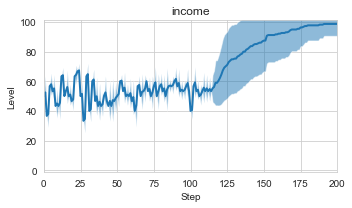

In [17]:
# show average plot 
element = 'income'
avg_plots[element]

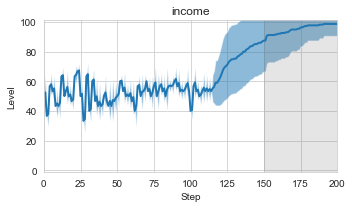

In [18]:
# can also modify plot objects
avg_plots['income'].axes[0].axvspan(
        150, 
        200,
        color='gray', 
        alpha=0.2
        )
avg_plots['income']

### Heatmaps

In [19]:
# only one scenario per plot for heatmaps
heatmap_plots = viz.plot_heatmap(
        traces_list[0], 
        elements_list = elements_list, 
        normalize_levels = normalize_levels
        )

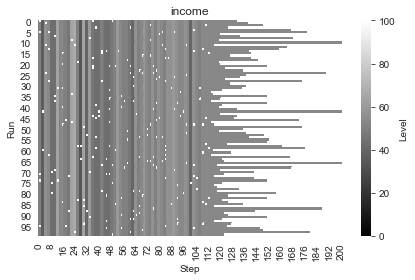

In [20]:
element = 'income'
heatmap_plots[element]

### Plot each run

In [21]:
# only one scenario per plot for heatmaps
run_plots = viz.plot_each_run(
        traces_list[0], 
        elements_list = elements_list, 
        normalize_levels = normalize_levels
        )

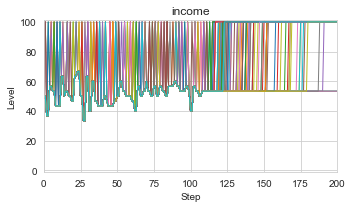

In [22]:
element = 'income'
run_plots[element]

### Plot value distribution

In [23]:
distribution_plots = viz.plot_distribution(
        traces_list[0],
        elements_list = elements_list
        )

/Users/gaoxiangzhou/OneDrive/Lab Research/framework/Visualization/visualization_interface.py:407: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/Users/gaoxiangzhou/OneDrive/Lab Research/framework/Visualization/visualization_interface.py:408: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


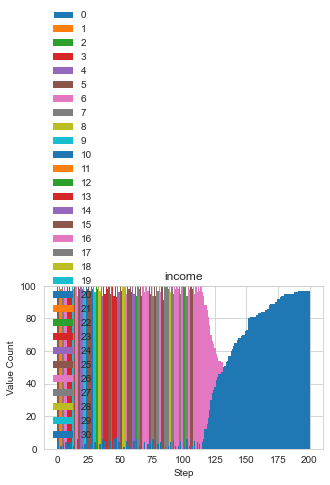

In [24]:
distribution_plots['income']

### Compare multiple elements

In [25]:
# only one scenario per plot
elements_plot = viz.plot_average_multiple_elements(
    traces_list[0],
    elements_list = elements_list, 
    normalize_levels = normalize_levels,
    errorbars = True,
    style = 'whitegrid',
    linewidth = linewidth,
    colors = colors,
    linestyles = linestyles
    )

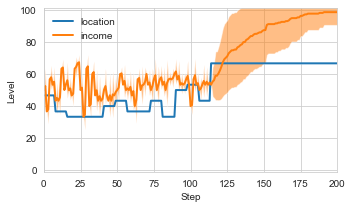

In [26]:
elements_plot

### Get end values

In [27]:
end_values = viz.get_end_values(traces_list[0], elements_list)

In [28]:
end_values

{'location': 66.66666666666667, 'income': 98.6}